<a href="https://colab.research.google.com/github/young-scientific-researcher/Nosov/blob/main/Nosov_STORM_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install locan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 957.5/957.5 kB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 46.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import locan as lc
import sys
import os

# Calibration data

In [188]:
path_calibr = '/content/filter500.csv'
df_cal = pd.read_csv(path_calibr)
df_cal.head()

,id,frame,x [nm],y [nm],sigma [nm],intensity [photon],offset [photon],bkgstd [photon],chi2,uncertainty [nm]
0,2.0,1.0,2077.880268,1308.425510,138.810309,3282.043388,58.090064,15.080998,161.141141,4.237640
1,7.0,1.0,17313.187011,4420.447035,147.458033,1902.830921,41.205528,11.298808,195.072196,6.079318
2,8.0,2.0,2077.219912,1306.862831,138.938580,3264.864884,57.512515,14.759602,169.469930,4.203528
3,12.0,3.0,2076.553595,1304.788463,141.488408,3029.132705,60.263168,12.964571,143.932843,4.241588
4,14.0,3.0,4250.929634,11548.038766,147.262244,667.000132,46.164966,6.812451,84.790921,10.372202


In [196]:
df_cal = df_cal.dropna()

In [197]:
df_cal = df_cal.rename(columns={'x [nm]': 'position_x', 'y [nm]': 'position_y'})

In [270]:
locdata_c = lc.LocData.from_dataframe(dataframe=df_cal)

<Axes: title={'center': 'counts'}, xlabel='position_x', ylabel='position_y'>

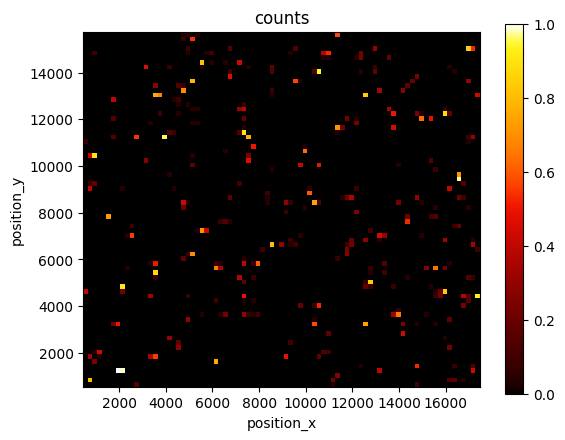

In [271]:
lc.render_2d(locdata_c, bin_size=200, rescale=lc.Trafo.EQUALIZE_0P3)

(3500.0, 10000.0)

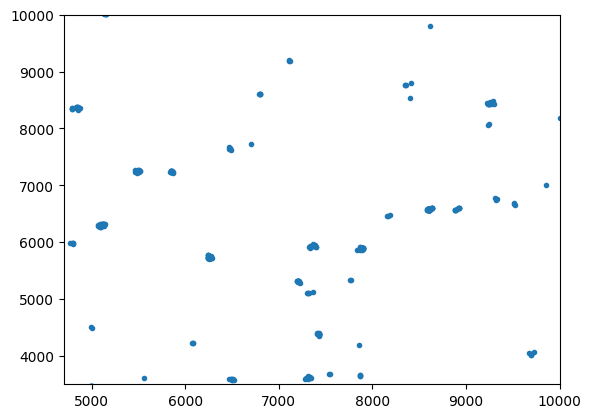

In [225]:
plt.scatter(df_cal['position_x'], df_cal['position_y'],   marker = '.')
plt.xlim(4700, 10000)
plt.ylim(3500, 10000)

(0.0, 50.0)

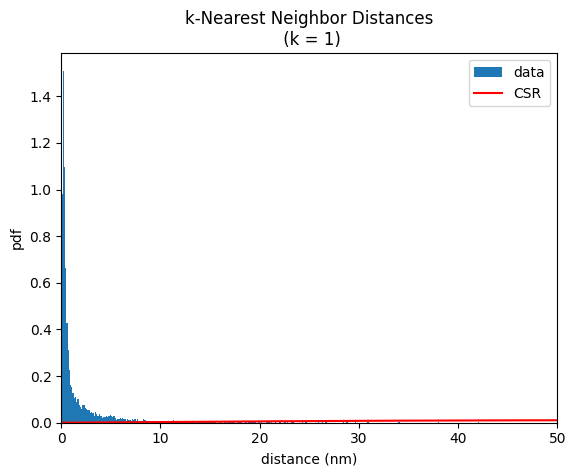

In [200]:
nn_c = lc.NearestNeighborDistances()
nn_c.compute(locdata_c)
nn_c.results.head()


In [202]:
len(nn_c.results.nn_index)

12889

(12830.0, 13000.0)

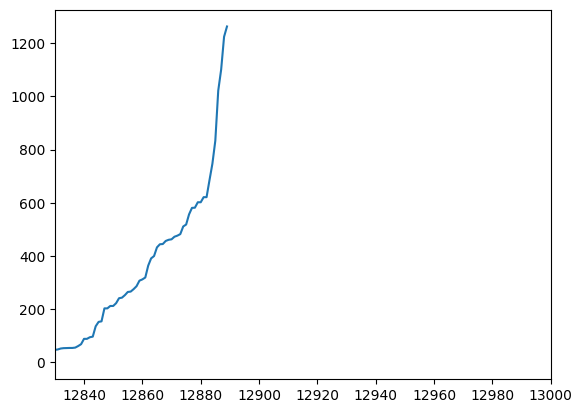

In [212]:
nn_c.results.sort_values(by=['nn_distance'], ascending = False)
nn_c.results.nn_index.max()
x = np.linspace(0, 12889, 12889)
plt.plot(x, nn_c.results.sort_values(by=['nn_distance'], ascending = True).nn_distance)
plt.xlim(12830, 13000)

In [226]:
rhf = lc.RipleysHFunction(radii=np.linspace(0, 500, 50))
rhf.compute(locdata_c)

RipleysHFunction(radii=[  0.          10.20408163  20.40816327  30.6122449   40.81632653
  51.02040816  61.2244898   71.42857143  81.63265306  91.83673469
 102.04081633 112.24489796 122.44897959 132.65306122 142.85714286
 153.06122449 163.26530612 173.46938776 183.67346939 193.87755102
 204.08163265 214.28571429 224.48979592 234.69387755 244.89795918
 255.10204082 265.30612245 275.51020408 285.71428571 295.91836735
 306.12244898 316.32653061 326.53061224 336.73469388 346.93877551
 357.14285714 367.34693878 377.55102041 387.75510204 397.95918367
 408.16326531 418.36734694 428.57142857 438.7755102  448.97959184
 459.18367347 469.3877551  479.59183673 489.79591837 500.        ], region_measure=bb)

<Axes: title={'center': "Ripley's H-function"}, xlabel='radius', ylabel='H-function'>

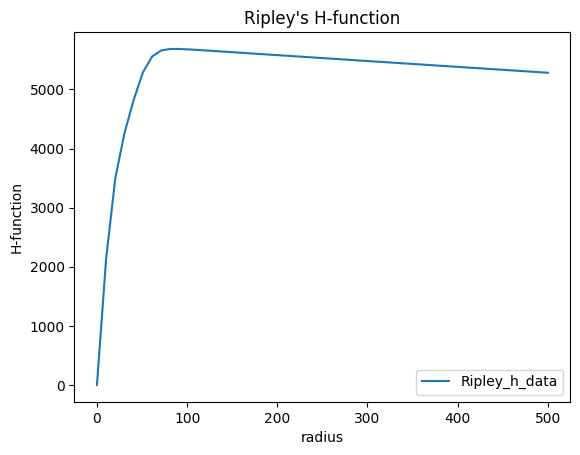

In [229]:
rhf.results.head()
rhf.plot()

In [230]:
rhf.Ripley_h_maximum

,radius,Ripley_h_maximum
Ripley_h_data,81.632653,5685.045734


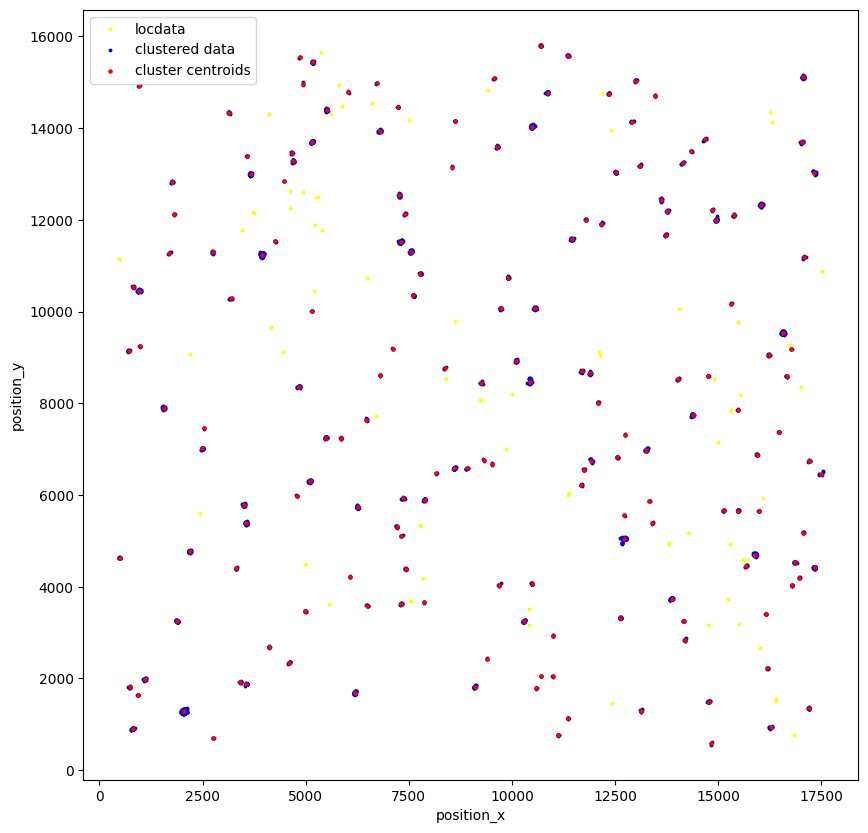

In [273]:
noise, clust = lc.cluster_dbscan(locdata_c, eps=80, min_samples=3)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,10))
locdata_c.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Yellow', label='locdata', s =3)
lc.LocData.concat(clust.references).data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='clustered data', s =3)
clust.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Red', s=5, label='cluster centroids')
plt.show()

In [232]:
ds = df_cal[['position_x', 'position_y']]

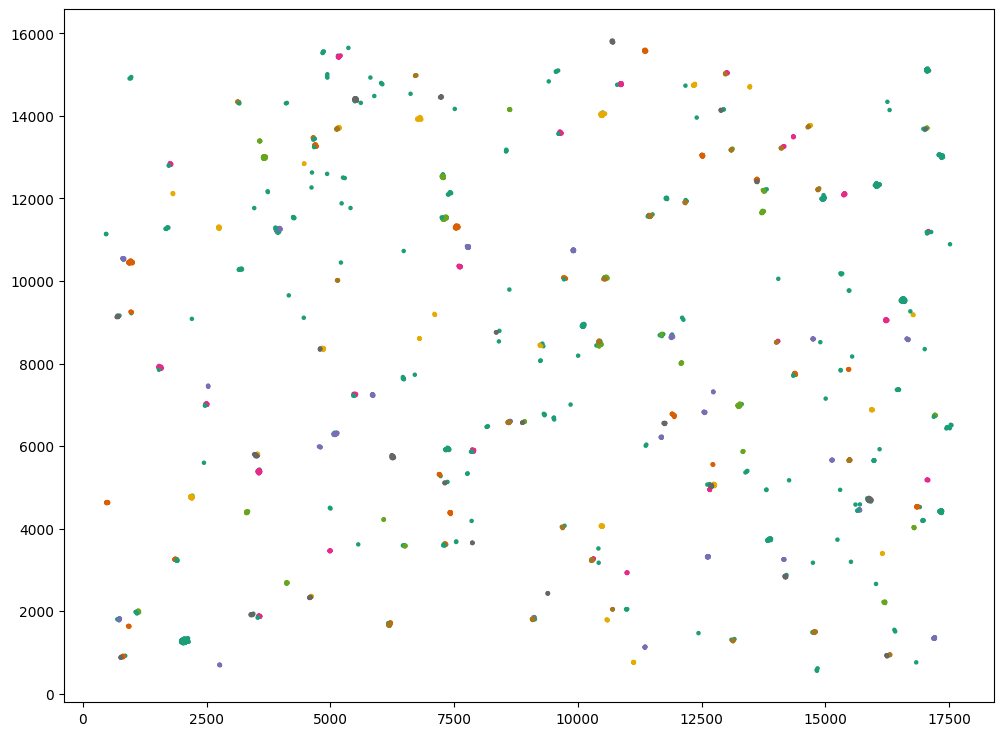

In [246]:
clusterer = DBSCAN(eps=20, min_samples=3, metric='euclidean')
y_pred = clusterer.fit_predict(ds)

plt.figure(figsize=(12,9))

plt.scatter(ds['position_x'], ds['position_y'], c=y_pred, s=5, cmap='Dark2')

In [287]:
from collections import Counter
d = Counter(clusterer.labels_)
df_count_clust = pd.DataFrame.from_dict(d, orient='index').reset_index()
df_count_clust.head()

,index,0
0,0,8128
1,1,150
2,2,6
3,3,85
4,4,5


In [291]:
df1 = df_count_clust.tail(-1)

In [292]:
df1.head()

,index,0
1,1,150
2,2,6
3,3,85
4,4,5
5,5,4


array([[<Axes: title={'center': 'index'}>, <Axes: title={'center': '0'}>]],
      dtype=object)

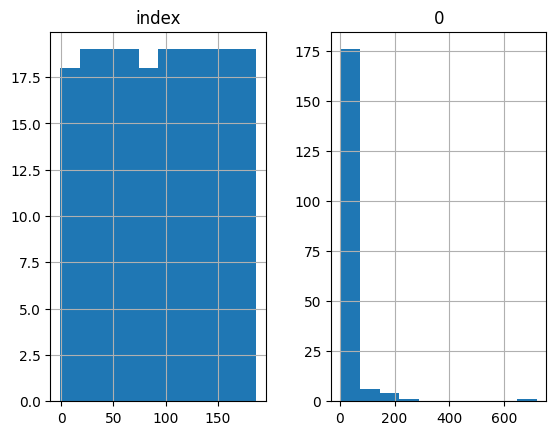

In [290]:
df1.hist()

In [ ]:
import seaborn as sns
p = sns.scatterplot(data = ds, x = "position_x", y = "position_y", hue = clusterer.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

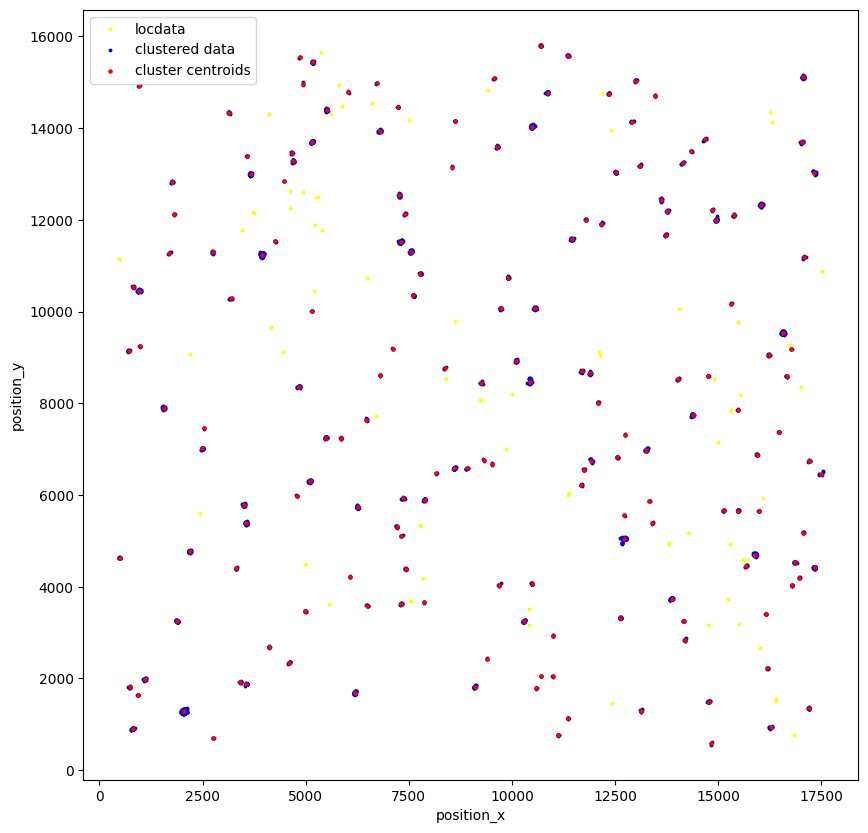

In [265]:
noise, clust = lc.cluster_dbscan(locdata_c, eps=80, min_samples=3)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,10))
locdata_c.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Yellow', label='locdata', s =3)
lc.LocData.concat(clust.references).data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='clustered data', s =3)
clust.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Red', s=5, label='cluster centroids')

plt.show()


In [274]:
len(clust.data['localization_count'])

174

In [282]:
clust.data

,localization_count,position_x,uncertainty_x,position_y,uncertainty_y,frame,region_measure_bb,localization_density_bb,subregion_measure_bb
0,8130,2047.676263,0.216316,1283.103375,0.172464,1.0,18277.438476,0.444811,544.048820
1,150,17337.855162,0.693363,4419.717379,0.725488,1.0,3420.363178,0.043855,233.936197
2,6,4256.928811,3.978957,11537.941163,4.331147,3.0,557.037171,0.010771,94.406573
3,85,16043.666671,1.846643,12322.713061,1.769259,6.0,8436.590203,0.010075,368.187065
4,9,3182.370392,7.953008,10285.177616,2.762439,8.0,1584.588268,0.005680,176.125349
...,...,...,...,...,...,...,...,...,...
169,3,8553.722683,3.208342,13159.711779,12.354926,7534.0,472.028340,0.006356,107.612935
170,6,17493.205573,17.705600,6466.441113,14.869402,8079.0,8940.546068,0.000671,379.458742
171,53,6259.432678,1.365029,5731.776315,1.930781,8448.0,3190.200378,0.016613,231.012387
172,3,9392.549481,2.296580,2431.216311,2.780943,8906.0,68.396542,0.043862,33.458016


from matplotlib import pyplot as plt
_df_37['localization_count'].plot(kind='hist', bins=20, title='localization_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38['position_x'].plot(kind='hist', bins=20, title='position_x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39['uncertainty_x'].plot(kind='hist', bins=20, title='uncertainty_x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_40['position_y'].plot(kind='hist', bins=20, title='position_y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_41.plot(kind='scatter', x='localization_count', y='position_x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_42.plot(kind='scatter', x='position_x', y='uncertainty_x', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_43.plot(kind='scatter', x='uncertainty_x', y='position_y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_44.plot(kind='scatter', x='position_y', y='uncertainty_y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45['localization_count'].plot(kind='line', figsize=(8, 4), title='localization_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['position_x'].plot(kind='line', figsize=(8, 4), title='position_x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['uncertainty_x'].plot(kind='line', figsize=(8, 4), title='uncertainty_x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_48['position_y'].plot(kind='line', figsize=(8, 4), title='position_y')
plt.gca().spines[['top', 'right']].set_visible(False)

In [283]:
pve_biased = lc.PositionVarianceExpectation(loc_property="position_x", expectation=250, biased=False).compute(locdata=clust)
pve_biased.results

<Axes: title={'center': 'Position Variance Expectation'}, xlabel='localization_count', ylabel='position_x_var'>

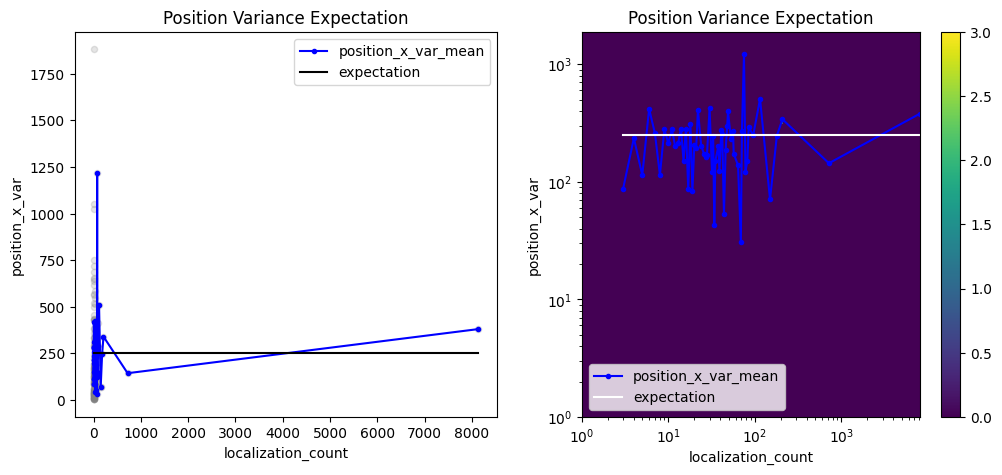

In [284]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
pve_biased.plot(ax=axes[0])
pve_biased.hist(ax=axes[1])

# Data for analysis

In [4]:
path = '/content/Area1.csv'
df = pd.read_csv(path)
df.head()

,id,frame,x [nm],y [nm],sigma [nm],intensity [photon],offset [photon],bkgstd [photon],chi2,uncertainty [nm]
0,58.0,1.0,8800.472114,47769.372565,148.158789,833.578172,79.456844,12.154074,163.339745,13.429929
1,64.0,1.0,9750.065511,40200.289050,160.083295,651.301689,105.723064,13.805885,180.297543,21.916757
2,65.0,1.0,9798.191716,41175.433459,154.860051,611.925724,136.621165,14.928176,153.434357,23.462790
3,70.0,1.0,10367.067947,40839.717681,113.186309,409.391850,142.680689,16.431337,202.648658,20.686166
4,80.0,1.0,11548.991715,43661.504541,143.989965,717.526487,161.365011,19.296849,225.983015,22.208482


In [32]:
len(df['y [nm]'])

94929

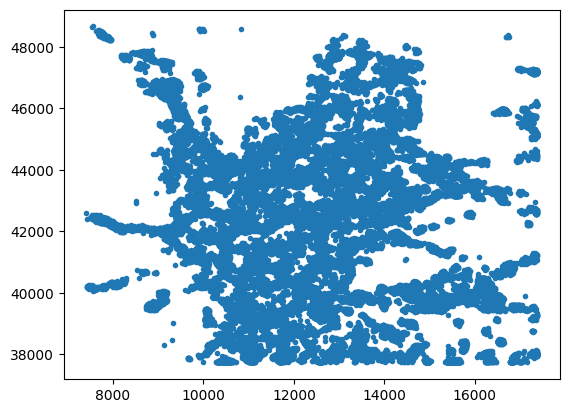

In [5]:
plt.scatter(df['x [nm]'], df['y [nm]'],   marker = '.')

In [6]:
df = df.rename(columns={'x [nm]': 'position_x', 'y [nm]': 'position_y'})

In [7]:
locdata = lc.LocData.from_dataframe(dataframe=df)

In [8]:
print(locdata.data.head())

     id  frame    position_x    position_y  sigma [nm]  intensity [photon]  \
0  58.0    1.0   8800.472114  47769.372565  148.158789          833.578172   
1  64.0    1.0   9750.065511  40200.289050  160.083295          651.301689   
2  65.0    1.0   9798.191716  41175.433459  154.860051          611.925724   
3  70.0    1.0  10367.067947  40839.717681  113.186309          409.391850   
4  80.0    1.0  11548.991715  43661.504541  143.989965          717.526487   

   offset [photon]  bkgstd [photon]        chi2  uncertainty [nm]  
0        79.456844        12.154074  163.339745         13.429929  
1       105.723064        13.805885  180.297543         21.916757  
2       136.621165        14.928176  153.434357         23.462790  
3       142.680689        16.431337  202.648658         20.686166  
4       161.365011        19.296849  225.983015         22.208482  


In [37]:
locdata.properties


{'localization_count': 94929,
 'position_x': 12368.017608038277,
 'uncertainty_x': 7.113724391037005,
 'position_y': 42148.034755745255,
 'uncertainty_y': 8.731269651470678,
 'frame': 1.0,
 'region_measure_bb': 109064114.04900202,
 'localization_density_bb': 0.0008703962877958998,
 'subregion_measure_bb': 41818.6871774615}

In [38]:
locdata.coordinate_keys


['position_x', 'position_y']

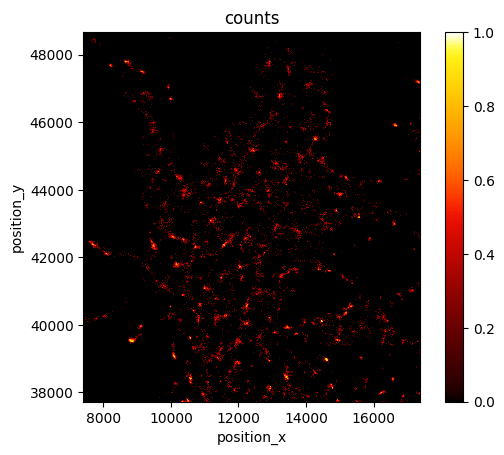

In [9]:
lc.render_2d(locdata, bin_size=10, rescale=lc.Trafo.EQUALIZE_0P3);

<Axes: title={'center': 'counts'}, xlabel='position_x', ylabel='position_y'>

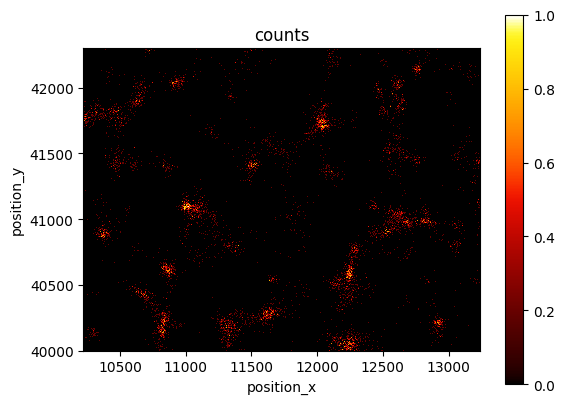

In [59]:
lc.render_2d(locdata, bin_size=5, rescale=lc.Trafo.EQUALIZE_0P3,
             bin_range=((10_220, 13_240), (40_000, 42_300)))

(0.0, 50.0)

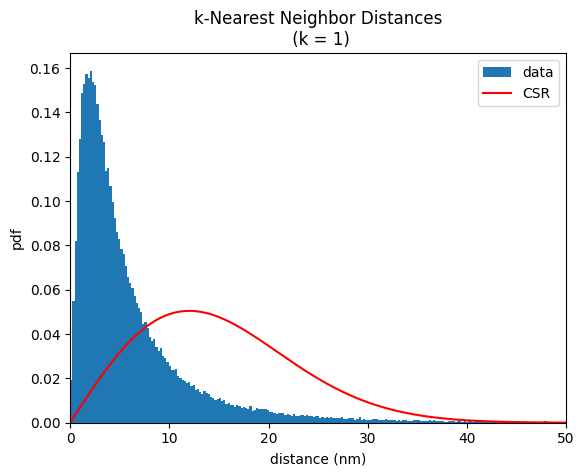

In [21]:
nn = lc.NearestNeighborDistances()
nn.compute(locdata)
nn.results.head()
nn.hist()
plt.xlim(0,50)

In [93]:
nn.results.nn_distance.max()

818.5046249534574

(120100.0, 120170.0)

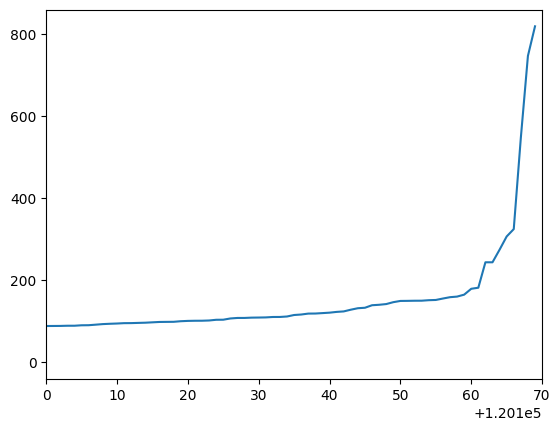

In [106]:
nn.results.sort_values(by=['nn_distance'], ascending = False)
nn.results.nn_index.max()
x = np.linspace(0, 120169, 120169)
plt.plot(x, nn.results.sort_values(by=['nn_distance'], ascending = True).nn_distance)
plt.xlim(120100, 120170)

In [22]:
nn.localization_density

0.0011018197969866477

In [29]:
rhf_csr = lc.RipleysHFunction(radii=np.linspace(0, 500, 50))
rhf_csr.compute(locdata)
rhf_csr.results.head()

,Ripley_h_data
radius,
0.000000,0.317761
10.204082,39.963718
20.408163,76.788562
30.612245,108.863601
40.816327,135.882825


In [40]:
rng = np.random.default_rng(seed=1)
locdata_csr = lc.simulate_Poisson(intensity=1e-3, region=((1,1000), (1,1000)), seed=rng)
locdata_blob = lc.simulate_Thomas(parent_intensity=1e-4, region=((7500,17500), (37500,48500)), cluster_mu=20, cluster_std=5, seed=rng)


In [41]:
rhf_csr_ = lc.RipleysHFunction(radii=np.linspace(0, 500, 50))
rhf_csr_.compute(locdata_csr)
rhf_csr_.results.head()

rhf_blob = lc.RipleysHFunction(radii=np.linspace(0, 500, 50))
rhf_blob.compute(locdata_blob)
rhf_blob.results.head()

,Ripley_h_data
radius,
0.000000,0.000000
10.204082,36.348899
20.408163,39.108763
30.612245,33.461630
40.816327,28.791257


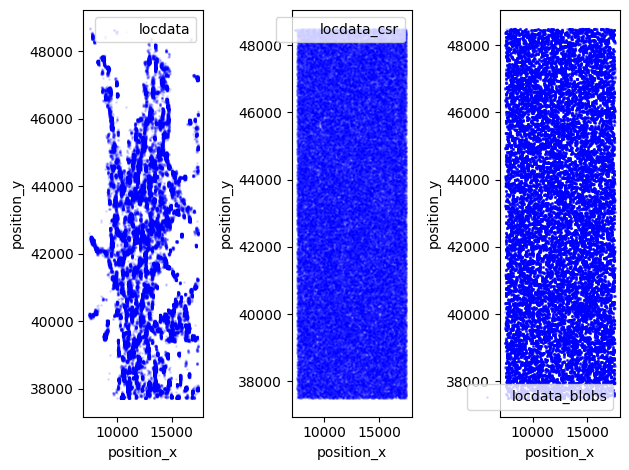

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=3)
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax[0], color='Blue', s=1, alpha=0.1, label='locdata')
locdata_csr.data.plot.scatter(x='position_x', y='position_y', ax=ax[1], color='Blue', s=1, alpha=0.1, label='locdata_csr')
locdata_blob.data.plot.scatter(x='position_x', y='position_y', ax=ax[2], color='Blue', s=1, alpha=0.1, label='locdata_blobs')

plt.tight_layout()
plt.show()


<Axes: title={'center': "Ripley's H-function"}, xlabel='radius', ylabel='H-function'>

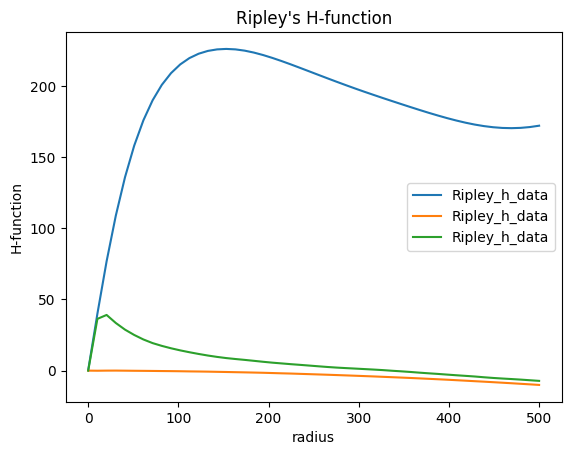

In [43]:
rhf_csr.plot()
rhf_csr_.plot()
rhf_blob.plot()

In [44]:
rhf_csr.Ripley_h_maximum

,radius,Ripley_h_maximum
Ripley_h_data,153.061224,225.989883


In [261]:
noise, clust = lc.cluster_dbscan(locdata, eps=20, min_samples=3)


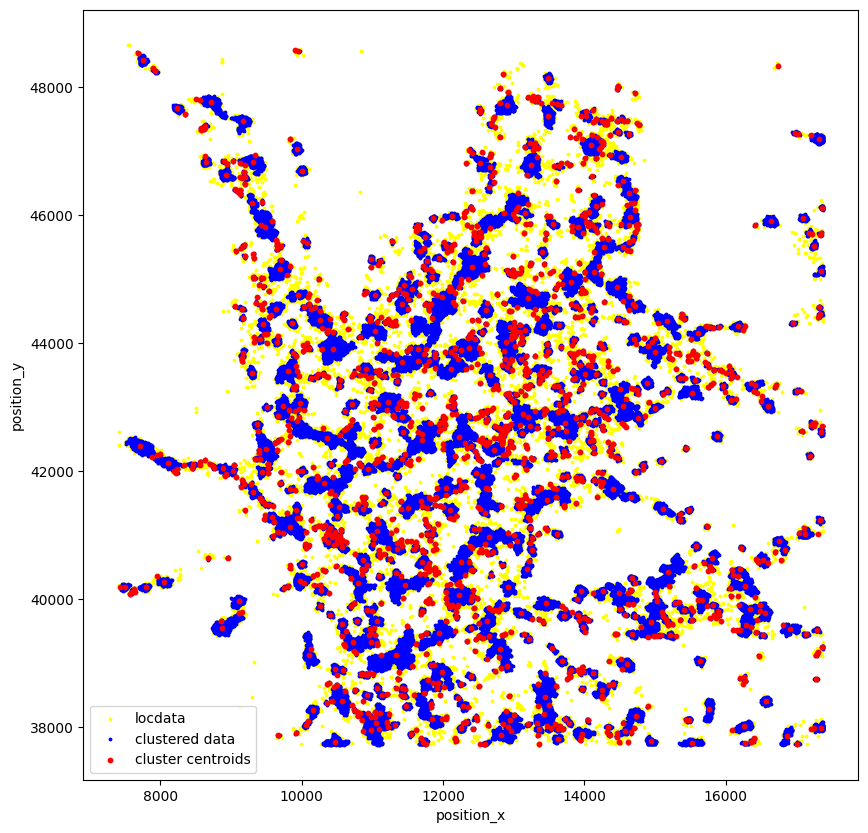

In [262]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10,10))
locdata.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Yellow', label='locdata', s =3)
lc.LocData.concat(clust.references).data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Blue', label='clustered data', s =3)
clust.data.plot.scatter(x='position_x', y='position_y', ax=ax, color='Red', s=10, label='cluster centroids')
# plt.xlim(8000, 10000)
# plt.ylim(45200, 48200)
plt.show()

In [81]:
len(clust.data['localization_count'])

7813

In [12]:
clustdata = lc.LocData.from_dataframe(dataframe=clust.data)

<Axes: title={'center': 'counts'}, xlabel='position_x', ylabel='position_y'>

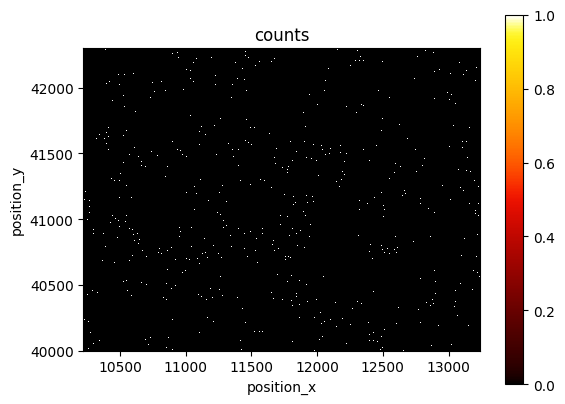

In [15]:
lc.render_2d(clustdata, bin_size=5, rescale=lc.Trafo.EQUALIZE_0P3, bin_range=((10_220, 13_240), (40_000, 42_300)))
# lc.render_2d(locdata, bin_size=5, rescale=lc.Trafo.EQUALIZE_0P3,
#              bin_range=((10_220, 13_240), (40_000, 42_300)))

In [117]:
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [121]:
dataset = df[['position_x', 'position_y']].copy()


In [143]:
dataset

,position_x,position_y
0,8800.472114,47769.372565
1,9750.065511,40200.289050
2,9798.191716,41175.433459
3,10367.067947,40839.717681
4,11548.991715,43661.504541
...,...,...
120164,13556.084211,45831.903255
120165,13683.741524,39783.395329
120166,13658.993601,44241.580935
120167,13995.321694,47153.494205


In [135]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(dataset)
distances, indices = neighbors_fit.kneighbors(dataset)


(120000.0, 120160.0)

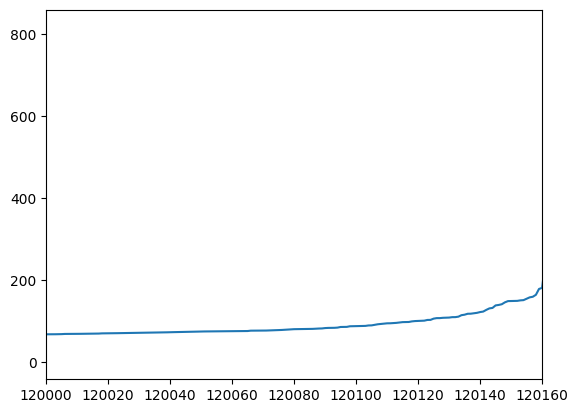

In [136]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlim(120000, 120160)

In [169]:
!pip install kneed
import kneed
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(indices)+1), y = distances, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

243.6503043165246


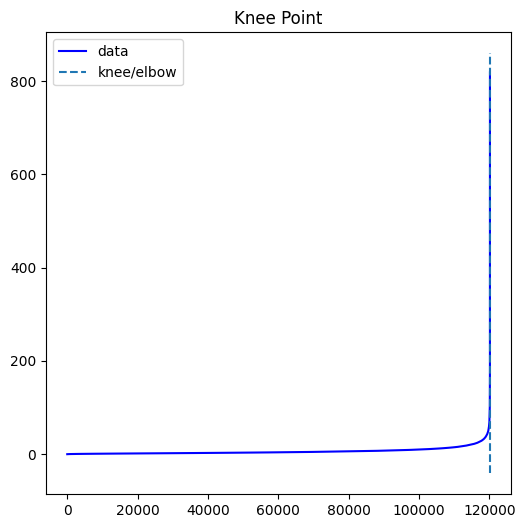

In [170]:
kneedle.plot_knee()

In [165]:
X = dataset.copy()[['position_x', 'position_y']]

In [166]:
X.head()

,position_x,position_y
0,8800.472114,47769.372565
1,9750.065511,40200.289050
2,9798.191716,41175.433459
3,10367.067947,40839.717681
4,11548.991715,43661.504541


In [186]:
clusterer = DBSCAN(eps=300, min_samples=4, metric='euclidean')
y_pred = clusterer.fit_predict(dataset)

In [147]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

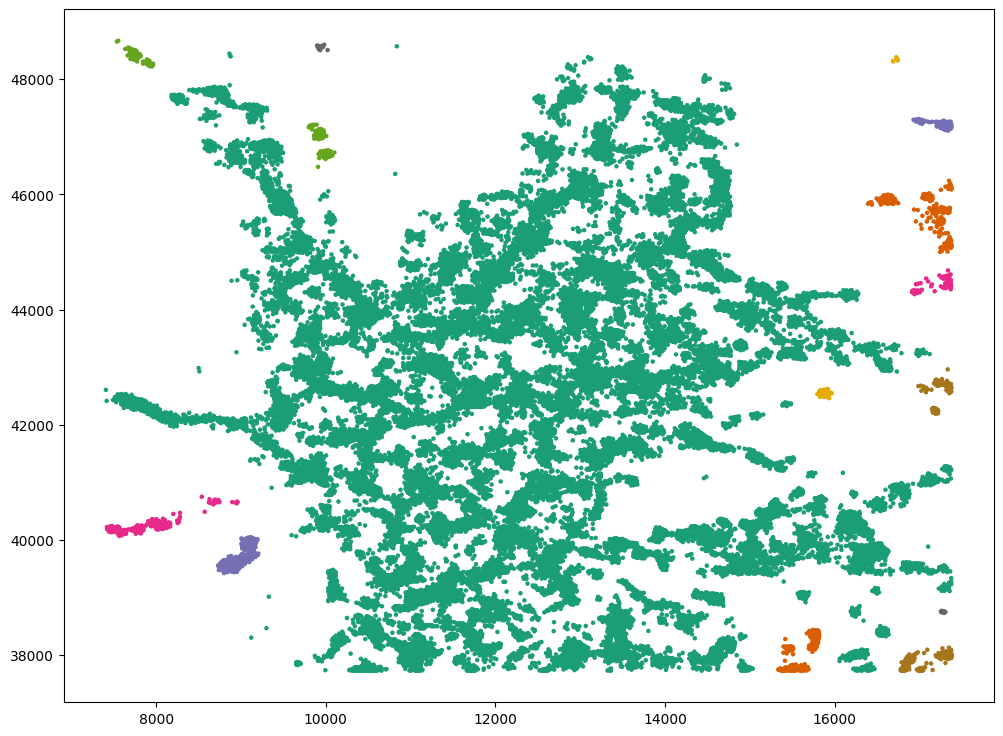

In [187]:

plt.figure(figsize=(12,9))

plt.scatter(dataset['position_x'], dataset['position_y'], c=y_pred, s=5, cmap='Dark2')

In [162]:
# plt.scatter(X['position_x'][y_pred==-1, 0], X['position_y'][y_pred==-1, 1], c='yellow', s=70, marker='x')
plt.scatter(X[y_pred!=-1, 0], X[y_pred!=-1, 1], c='gray', s=50)

InvalidIndexError: (array([ True,  True,  True, ...,  True,  True,  True]), 0)